Axes(0.125,0.2;0.775x0.68)


,Close,short_avg,long_avg,action
Date,,,,
2006-06-06 00:00:00-04:00,33.270508,34.736705,34.816145,sell
2006-10-11 00:00:00-04:00,35.710541,34.420180,34.346966,buy
2008-01-28 00:00:00-05:00,38.269043,42.058274,42.252278,sell
2008-05-30 00:00:00-04:00,43.206192,41.682762,41.572408,buy
2008-07-03 00:00:00-04:00,38.585041,41.507958,41.574581,sell
2009-05-20 00:00:00-04:00,29.749048,29.077934,28.990882,buy
2010-07-07 00:00:00-04:00,38.486355,39.367658,39.405591,sell
2010-08-18 00:00:00-04:00,39.878365,39.921854,39.864365,buy
2010-08-25 00:00:00-04:00,38.582642,39.939363,39.942240,sell



        amount_of_stocks = 0
        money = 8313.361934661865
        profit = 7313.361934661865
      


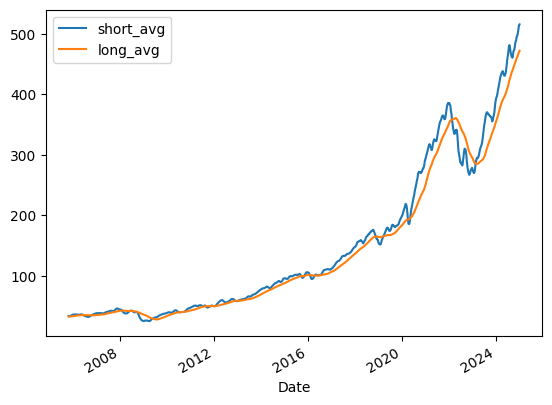

In [ ]:
import pandas as pd
import yfinance as yf

# Імпортуємо дані та вибираємо ціну закриття
qqq = yf.Ticker("QQQ").history(start="2005-01-01",end="2025-01-01")
qqq = qqq.dropna()["Close"]

# Розрахунок довгострокого та короткострокового ковзного середнього
short_avg = [qqq.iloc[n - 30: n].mean() for n in range(200,len(qqq))]
long_avg = [qqq.iloc[n - 200:n].mean() for n in range(200,len(qqq))]

df = pd.DataFrame(qqq[200:])
df["short_avg"] = short_avg
df["long_avg"] = long_avg

# Розробка моделі та створеня сигналів: утримання, неутримання, купівля, продаж
action = []
for n in range(len(df)):
    if df["short_avg"].iloc[n] > df["long_avg"].iloc[n]:
        action.append("hold")
    elif df["short_avg"].iloc[n] < df["long_avg"].iloc[n]:
        action.append("not hold")
for n in range(1,len(df)):
    if (action[n - 1] == "not hold" and action[n] == "hold") or (action[n - 1] == "sell" and action[n] == "hold"):
        action[n] = "buy"
    elif (action[n - 1] == "hold" and action[n] == "not hold") or (action[n - 1] == "buy" and action[n] == "not hold"):
        action[n] = "sell"
df["action"] = action


print(df[["short_avg","long_avg"]].plot())
display(df[(df["action"] == "buy") | (df["action"] == "sell")])

# Розрахунок єфективності моделі на основі історчних даних
amount_of_stocks = 0
money = 1000
for n in range(len(df)):
    if df["action"].iloc[n] == "buy":
        amount_of_stocks = money // df["Close"].iloc[n]
        money = money % df["Close"].iloc[n]

    elif df["action"].iloc[n] == "sell":
        if amount_of_stocks == 0:
            continue
        money += amount_of_stocks * df["Close"].iloc[n]
        amount_of_stocks = 0

money += amount_of_stocks * df["Close"].iloc[-1]
profit = money - 1000
amount_of_stocks = 0

print(f"""
        amount_of_stocks = {amount_of_stocks}
        money = {money}
        profit = {profit}
      """)



